In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import copy
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import cv2
import os
import random
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['download.png', 'plain-white-background.jpg']


In [2]:
a=cv2.imread('../input/plain-white-background.jpg')
a=cv2.resize(a,(1200,1200))

In [3]:
q_table=np.zeros((4,36))
q_table.fill(10000)

In [4]:
observation_ground=np.zeros((6,6))

In [5]:
initial=[5,0]
final=[0,5]
obstacles=[(1,2),(3,5),(4,5),(3,3)]
for x,y in enumerate(obstacles):
    observation_ground[y[0]][y[1]]=1
observation_ground[initial[0]][initial[1]]=6
observation_ground[final[0]][final[1]]=6
print(observation_ground)

[[0. 0. 0. 0. 0. 6.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [6. 0. 0. 0. 0. 0.]]


In [6]:
def check(x,observation_ground,q_table,alpha):
        #print("new co ordinates "+str(x))
        if x[0]==0 & x[1]==5:
            observation_ground[0][5]=7
            #print("reached destination")
            return 100000
        elif x[1]<0 or x[0]<0 or x[1]>5 or x[0]>5:
            #print("illegal move")
            return -10000
        elif observation_ground[x[0]][x[1]]==1:
            #print("blocked")
            return -10000
        elif observation_ground[x[0]][x[1]] in [2,3,4,5]:
            #print('already_visited')
            return -100
        
        else:
            observation_ground[x[0]][x[1]]=7
            return 100+alpha*max([y[x[0]*6+x[1]] for y in q_table])
        
        

In [7]:
state_map=copy.deepcopy(observation_ground)
for x in range(6):
    for y in range(6):
        state_map[x][y]=x*6+y
print(state_map)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35.]]


In [8]:
def reset():
    observation_ground[observation_ground==2]=0
    observation_ground[observation_ground==3]=0
    observation_ground[observation_ground==4]=0
    observation_ground[observation_ground==5]=0
    observation_ground[observation_ground==7]=0
    state=initial[0]*6+initial[1]
    

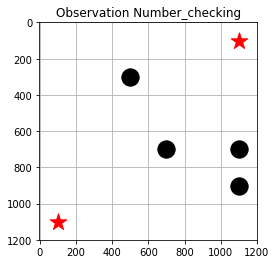

<Figure size 432x288 with 0 Axes>

In [9]:
def visualize(background,q_table,x1):
    #print('q_table after 1 observation')
    #print(q_table)
    #print("background after move")
    #print(background)
    plt.imshow(a)
    for x in range(6):
        for y in range(6):
            if  background[x][y]==6:
                plt.scatter(y*200+100,x*200+100,color='red',marker='*',s=300)
            elif background[x][y]==7:
                plt.scatter(y*200+100,x*200+100,color='blue',marker='p',s=300)
            elif background[x][y]==2:
                plt.scatter(y*200+100,x*200+100,color='green',marker='<',s=300)
            elif background[x][y]==3:
                plt.scatter(y*200+100,x*200+100,color='green',marker='^',s=300)
            elif background[x][y]==4:
                plt.scatter(y*200+100,x*200+100,color='green',marker='>',s=300)
            elif background[x][y]==5:
                plt.scatter(y*200+100,x*200+100,color='green',marker='v',s=300)
            elif background[x][y]==1:
                plt.scatter(y*200+100,x*200+100,color='black',marker='o',s=300)
           
    plt.grid(True)
    plt.title("Observation Number_"+str(x1))
    plt.show()
    plt.savefig("observation_"+str(x1)+".jpg")
visualize(observation_ground,q_table,"checking")


In [10]:
def state_updater(initial1,x,y,reward,state):
    if reward>0:
        return [initial1[0]+x,initial1[1]+y]
    else:
        return initial1

In [11]:
def all_blocked(x):
    x1=[f+x[0] for f in [0,-1,0,1]]
    y1=[f+x[1] for f in [-1,0,1,0]]
    for x2,y2 in zip(x1,y1):
        if x2>5 or x2<0 or y2>5 or y2<0:
            pass
        elif observation_ground[x2][y2] in [1,2,3,4,5]:
            pass
        else:
            return False
    return True

[5, 0]


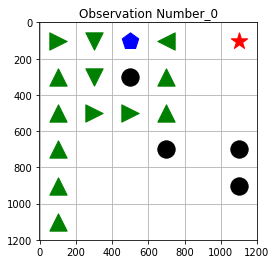

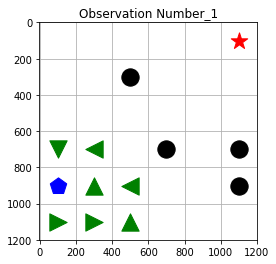

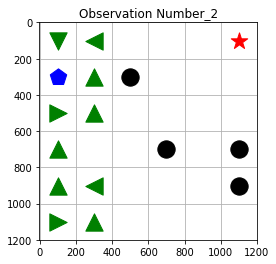

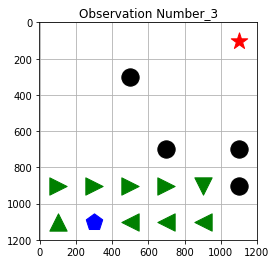

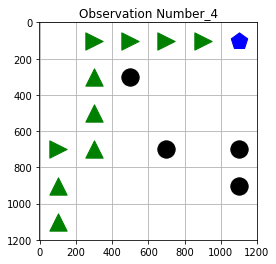

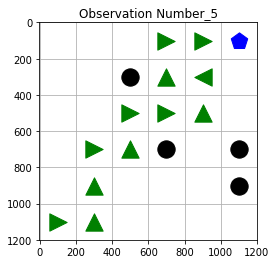

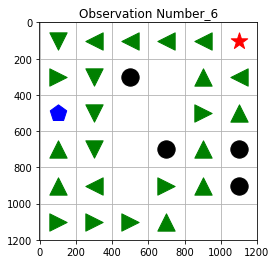

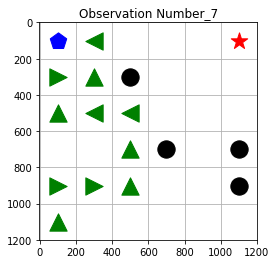

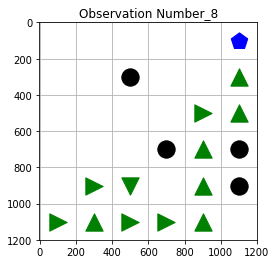

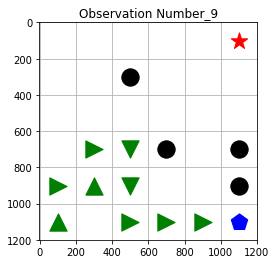

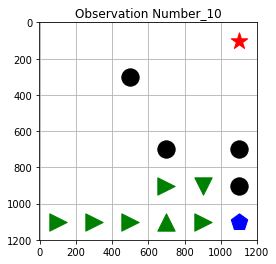

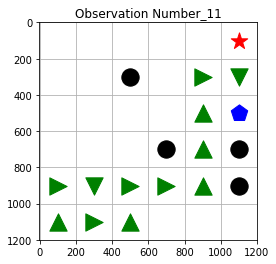

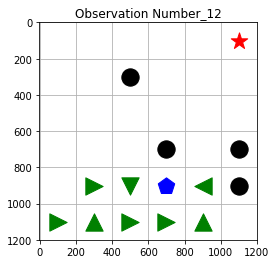

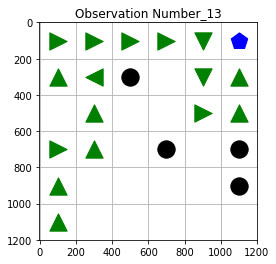

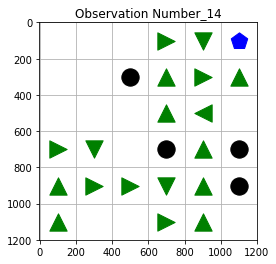

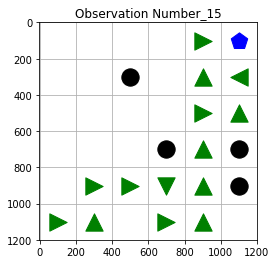

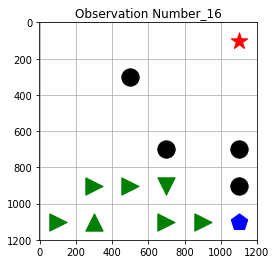

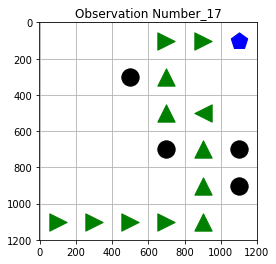

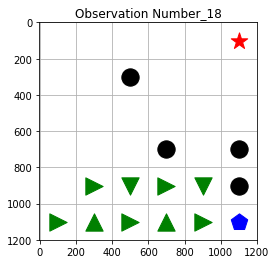

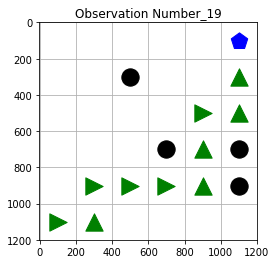

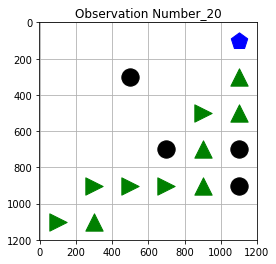

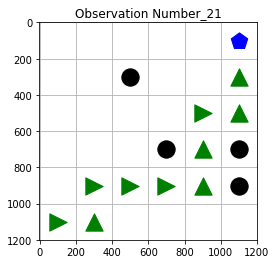

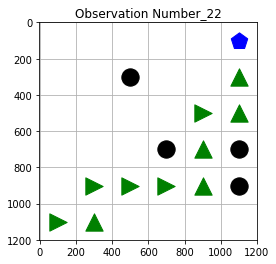

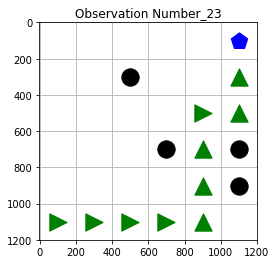

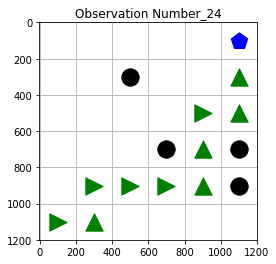

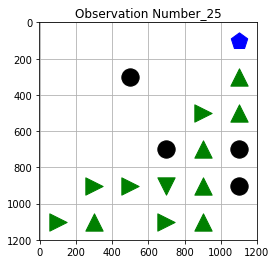

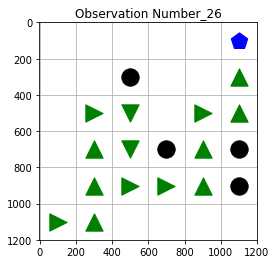

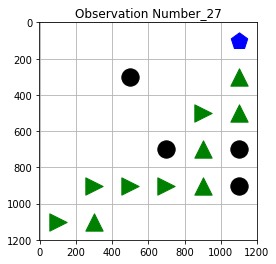

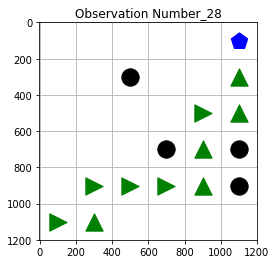

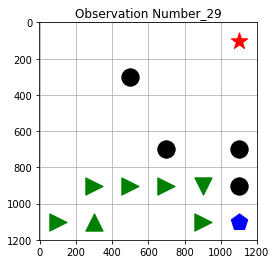

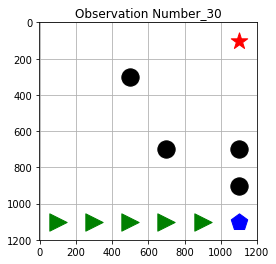

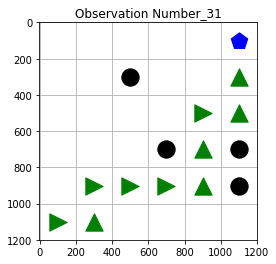

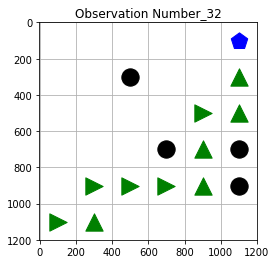

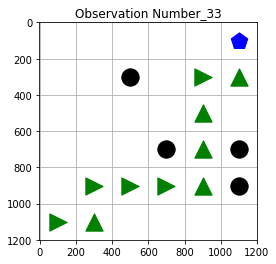

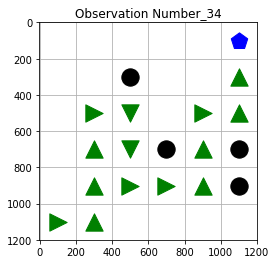

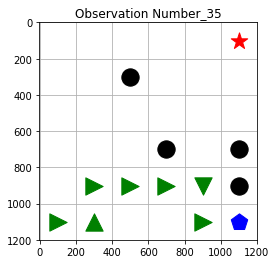

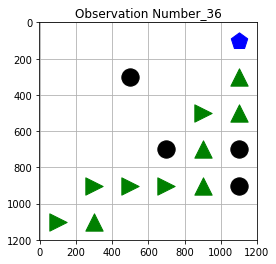

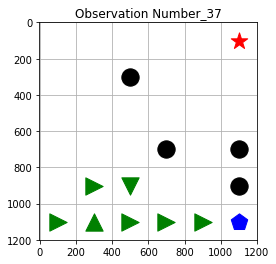

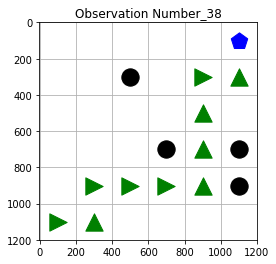

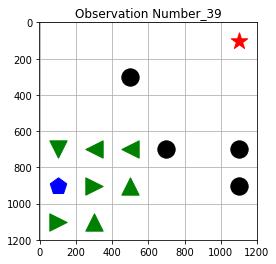

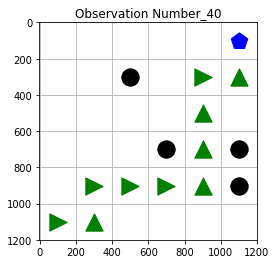

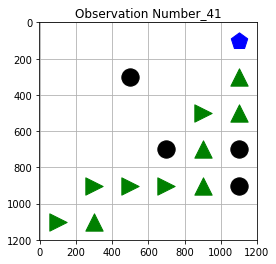

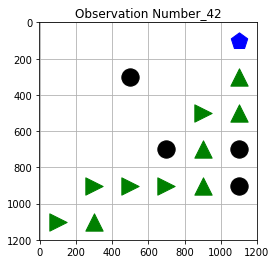

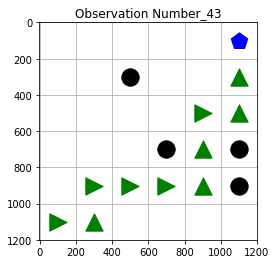

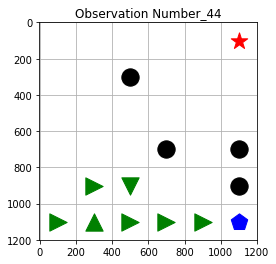

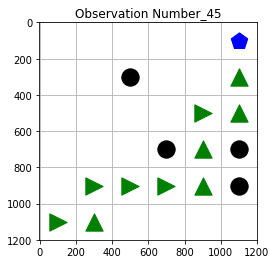

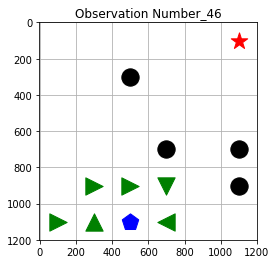

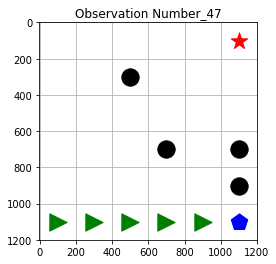

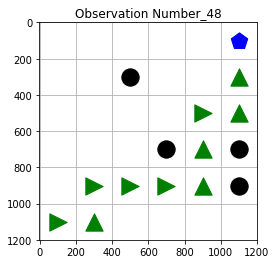

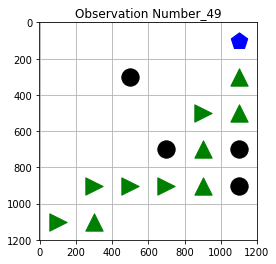

<Figure size 432x288 with 0 Axes>

In [12]:
action={'0':(0,-1),'1':(-1,0),'2':(0,1),'3':(1,0)}
state_dict={'0':-1,'1':-6,'2':1,'3':6}
counter_state=0
previous_action=0
previous_state=30
randomness=11
print(initial)
alpha=0.1
for x1 in range(0,50):
    reset()
    state=initial[0]*6+initial[1]
    initial1=copy.deepcopy(initial)
    observation_ground[initial[0]][initial[1]]=6
    observation_ground[final[0]][final[1]]=6
    action_to_be_taken=0
    alpha+=0.05
    if x1%50==0:
        randomness+=1
    while observation_ground[0][5]==6:
        #print("counter_&_observation"+" "+str(x1))
        #print("state for the observation_"+str(state))
        if all_blocked(initial1):
            q_table[previous_action][previous_state]+=0.05*(-100-q_table[previous_action][previous_state])
            break;
        x=random.randint(1,randomness)
        if x>3:
            action_to_be_taken=np.argmax([x[state] for x in q_table])
        else:
            action_to_be_taken=random.randint(0,3)
        #print("action_to_be_taken "+str(action_to_be_taken+2))
        x=action[str(action_to_be_taken)]
        reward=check([initial1[0]+x[0],initial1[1]+x[1]],observation_ground,q_table,alpha)
        #print("reward received for action_"+str(reward))
        q_table[action_to_be_taken][state]+=0.05*(reward-q_table[action_to_be_taken][state])
        #print("q table status for observation ")
        #print(q_table)
        pinitial1=copy.deepcopy(initial1)
        initial1=state_updater(initial1,x[0],x[1],reward,state)
        if reward>0:
            counter_state=0
            previous_state=state
            previous_action=action_to_be_taken
            state+=state_dict[str(action_to_be_taken)]
            #print("state for the observation_"+str(state))
            if action_to_be_taken==0:
                observation_ground[pinitial1[0]][pinitial1[1]]=2
            elif action_to_be_taken==1:
                observation_ground[pinitial1[0]][pinitial1[1]]=3
            elif action_to_be_taken==2:
                observation_ground[pinitial1[0]][pinitial1[1]]=4
            elif action_to_be_taken==3:
                observation_ground[pinitial1[0]][pinitial1[1]]=5
    visualize(observation_ground,q_table,x1)
        
            
            
        
        
    

In [13]:
print("q_table after 50 episodes")
q_table

q_table after 50 episodes


array([[ 9000.        ,  8671.347625  ,  8775.8975    ,  8871.2       ,
         9236.7725    , 10000.        ,  9000.        ,  8952.6875    ,
        10000.        ,  9000.        ,  9705.        ,  8755.62438125,
         9000.        ,  9266.        ,  9268.5       ,  9495.        ,
         9458.214375  ,  8559.4875    ,  9000.        ,  9626.33625   ,
         9643.71192859, 10000.        ,  8050.        , 10000.        ,
         8050.        ,  8886.94596875,  8220.824375  ,  7715.18746875,
         8907.246875  , 10000.        ,  1974.73878477,  7715.18746875,
         8278.513125  ,  9047.76967721,  7448.23304531, 10000.        ],
       [ 9000.        ,  9000.        ,  9000.        ,  8050.        ,
         9000.        , 10000.        ,  9469.84      ,  9106.575     ,
        10000.        ,  9247.3151875 ,  9660.750625  , 16384.66332678,
         9356.        ,  9231.338     ,  9000.        ,  9501.14159375,
        10711.79216094, 19128.30205103,  8536.56875   , 10230.7

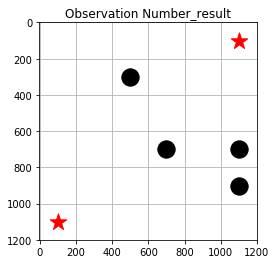

[[0. 0. 0. 0. 0. 3.]
 [0. 0. 1. 0. 0. 3.]
 [0. 0. 0. 0. 3. 4.]
 [0. 0. 0. 1. 3. 1.]
 [0. 3. 4. 4. 4. 1.]
 [6. 4. 0. 0. 0. 0.]]


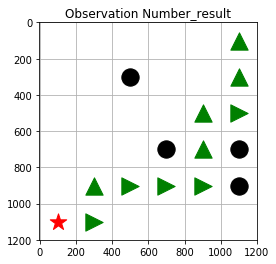

<Figure size 432x288 with 0 Axes>

In [14]:
reset()
observation_ground[initial[0]][initial[1]]=6
observation_ground[final[0]][final[1]]=6
action_to_be_taken=0
state=30
c=0
initial2=copy.deepcopy(initial)
visualize(observation_ground,q_table,"result")
while observation_ground[0][5]==6:
        c+=1
        #print("initial point_&state"+str(initial2)+" "+str(state))
        action_to_be_taken=np.argmax([x[state] for x in q_table])
        x=action[str(action_to_be_taken)] 
        initial2=state_updater(initial2,x[0],x[1],reward,state)
        state+=state_dict[str(action_to_be_taken)]
        if action_to_be_taken==0:
                observation_ground[initial2[0]][initial2[1]]=2
        elif action_to_be_taken==1:
                observation_ground[initial2[0]][initial2[1]]=3
        elif action_to_be_taken==2:
                observation_ground[initial2[0]][initial2[1]]=4
        elif action_to_be_taken==3:
                observation_ground[initial2[0]][initial2[1]]=5
        if c==40:
            break
print(observation_ground)
visualize(observation_ground,q_table,"result")     
            